In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine()
X1 = dataset["data"]
y1 = dataset["target"]
feature_names1 = dataset["feature_names"]


In [3]:
df=pd.DataFrame(data=X1,columns=feature_names1)

In [4]:
df['y']=y1

In [5]:
df.shape #There are available 178 records

(178, 14)

In [6]:
df.isna().sum() #There are not missiing values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
y                               0
dtype: int64

In [7]:
df['y'].value_counts() #Number of elements for every class

1    71
0    59
2    48
Name: y, dtype: int64

In [8]:
tr=DecisionTreeClassifier()

In [9]:
tr.fit(X1,y1)

DecisionTreeClassifier()

In [10]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

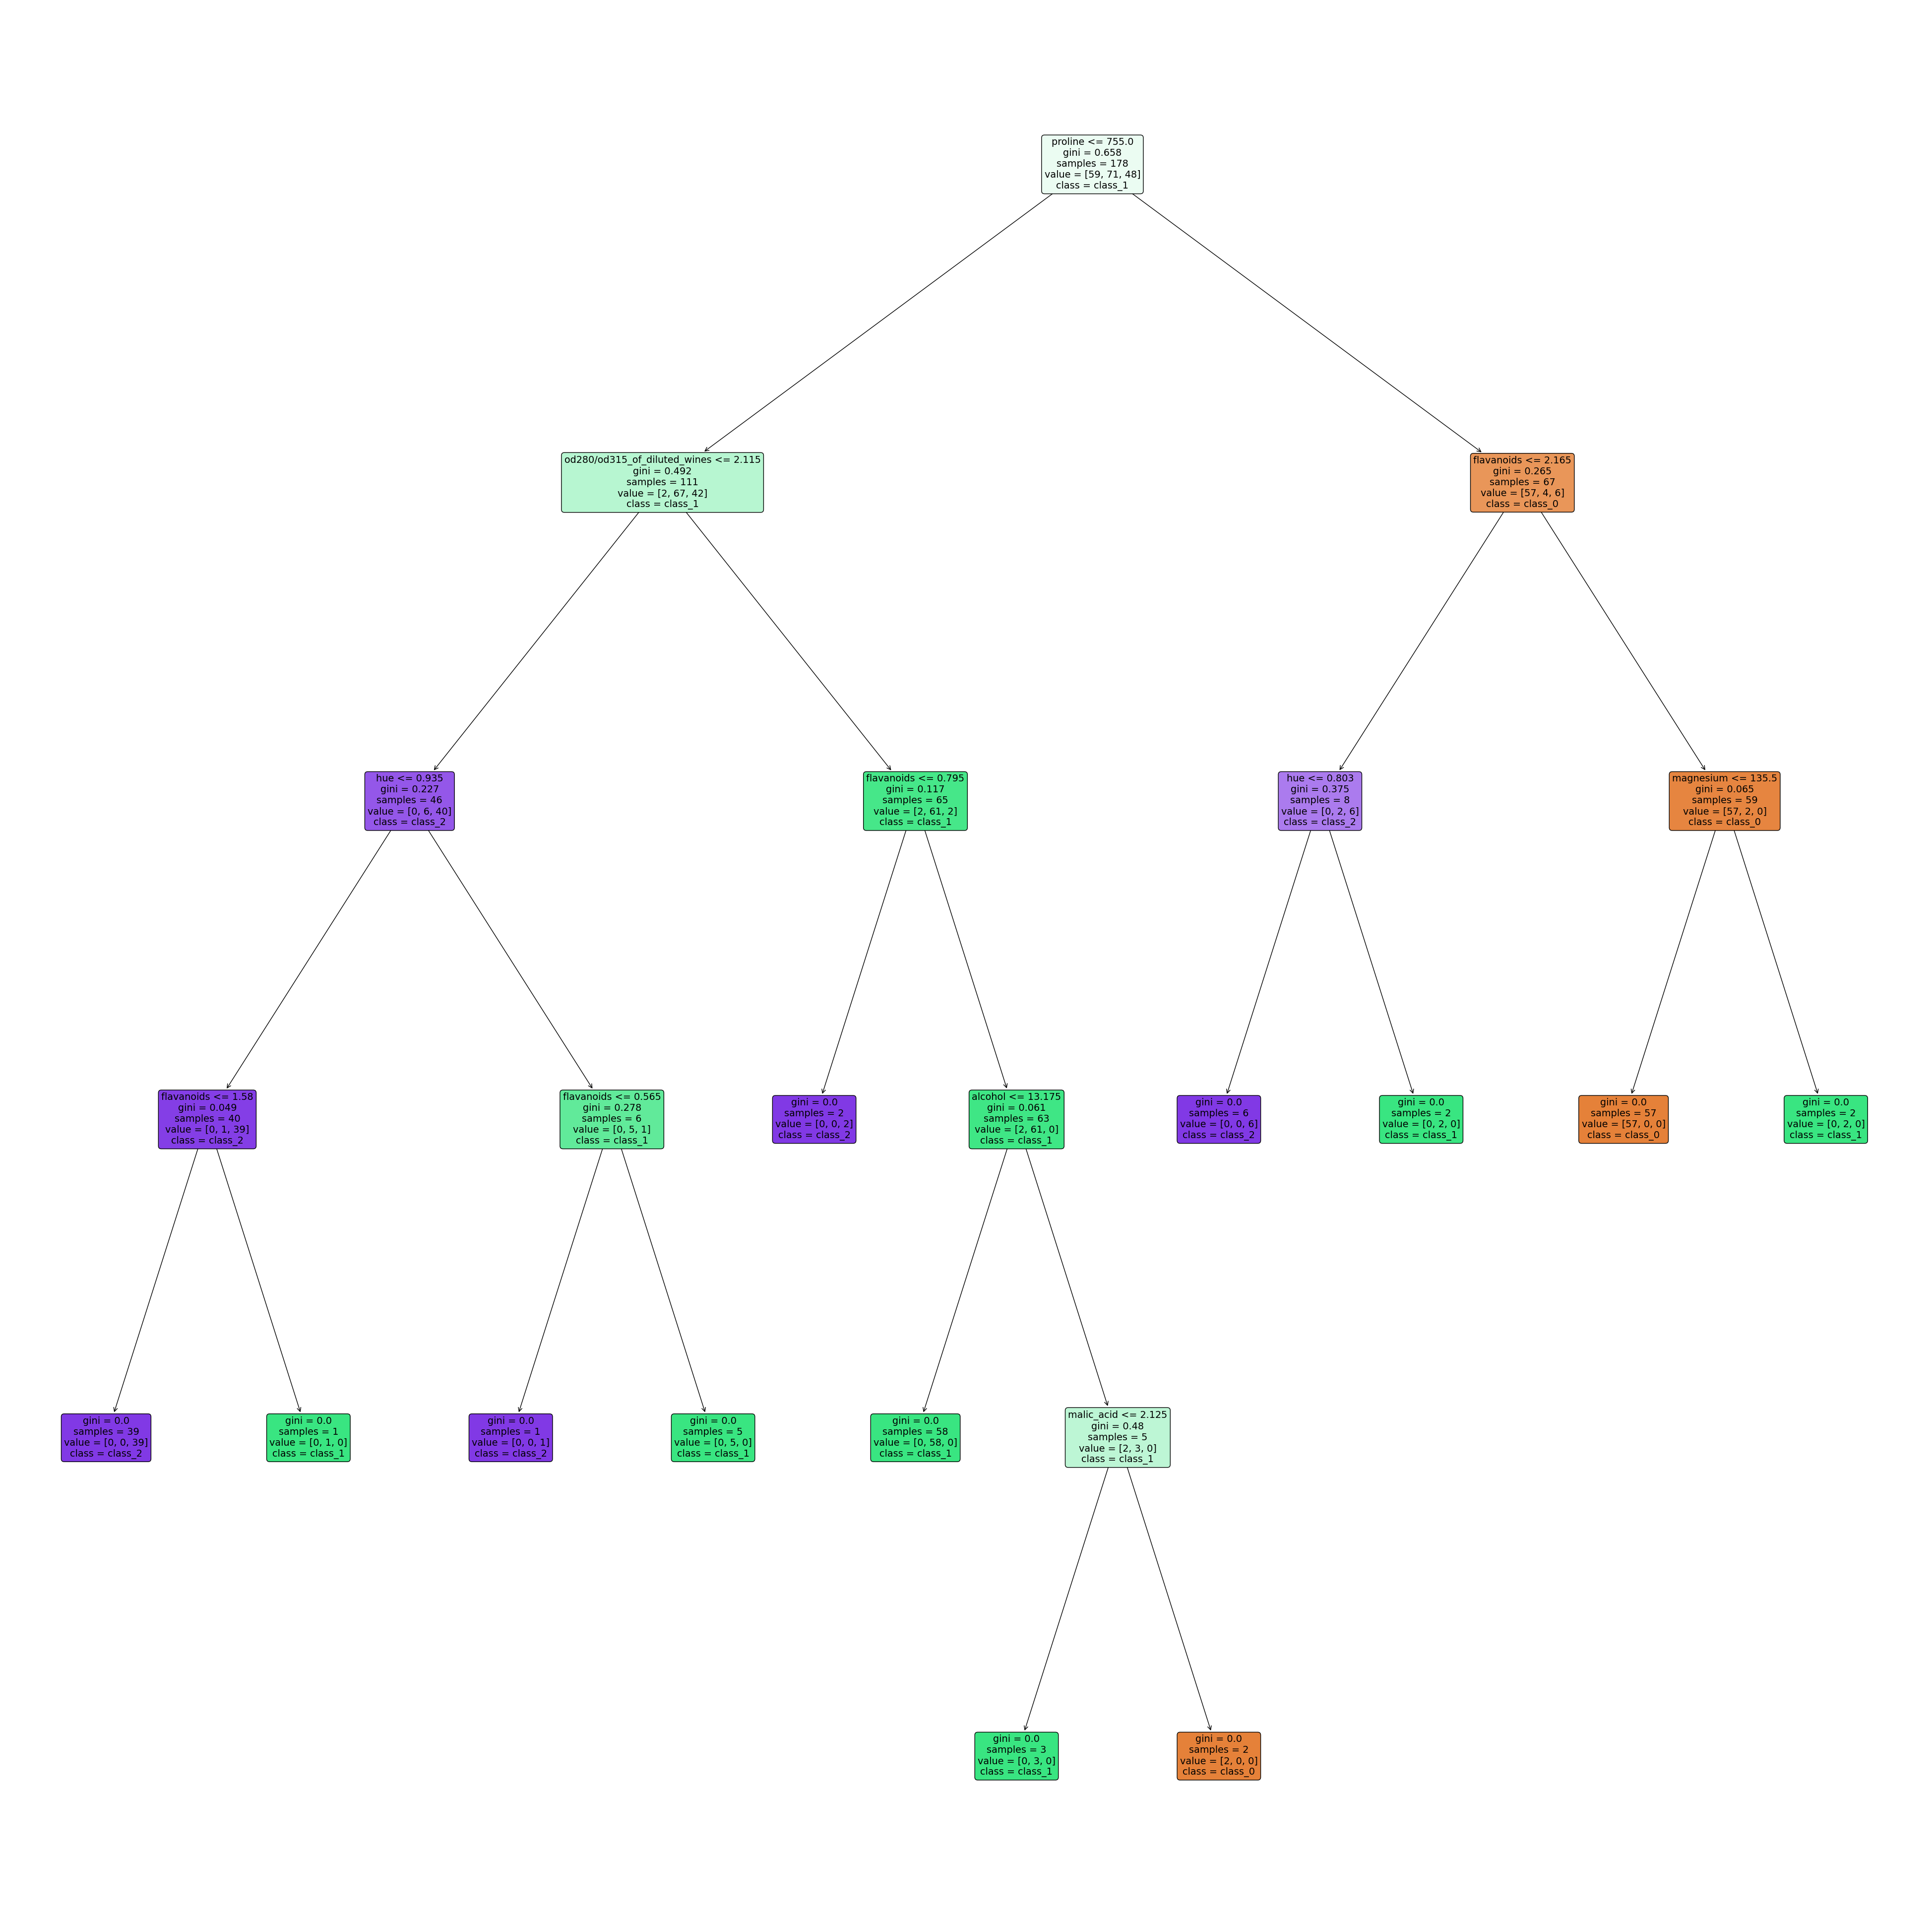

In [11]:
plt.figure(figsize=(50, 50))
plot_tree(tr, filled=True, feature_names=feature_names1 , class_names=dataset.target_names, rounded=True)
plt.show()

#From the desicion tree we can say that the tree is starting by the last feature that is the proline, depending if the value get a proline less or equal to 755, we will analize another 2 features.
# with respect to the overfiting, in the last nodes of the tree, there are pretty little samples in the class 2 and 1 with respect to the class 0 if we take the way of flavonids and color_intensity but in the other side we use a lot of features and the samples are really short

In [12]:
pred=tr.predict(X1)

In [13]:
accuracy_score(y1,pred) #This result is a clear overfiting case, because the predictions and the y are exactly the same

1.0

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X1,y1,test_size=0.2)

In [15]:
tr.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred=tr.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred) #This is a good result

1.0

In [18]:
metrics=classification_report(y_test,y_pred)

In [19]:
metrics

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        14\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        36\n   macro avg       1.00      1.00      1.00        36\nweighted avg       1.00      1.00      1.00        36\n'

In [20]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

In [21]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X1,y1,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]


In [41]:
X_train_valid

array([[1.439e+01, 1.870e+00, 2.450e+00, ..., 1.020e+00, 3.580e+00,
        1.290e+03],
       [1.200e+01, 3.430e+00, 2.000e+00, ..., 9.300e-01, 3.050e+00,
        5.640e+02],
       [1.386e+01, 1.350e+00, 2.270e+00, ..., 1.010e+00, 3.550e+00,
        1.045e+03],
       ...,
       [1.329e+01, 1.970e+00, 2.680e+00, ..., 1.070e+00, 2.840e+00,
        1.270e+03],
       [1.156e+01, 2.050e+00, 3.230e+00, ..., 9.300e-01, 3.690e+00,
        4.650e+02],
       [1.475e+01, 1.730e+00, 2.390e+00, ..., 1.250e+00, 2.730e+00,
        1.150e+03]])

In [22]:
#Now we are gonna make the decision tree with some changes in the parameters
from sklearn.model_selection import ParameterGrid
params = {
"max_depth": [None, 2, 4, 8],
"splitter": ["best", "random"],
"max_features":[13,7,3,10],
"ccp_alpha":[0,0.3,0.6,0.8]
}

max_accuracy = 0
best_config = None

for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_valid)
    val=(accuracy_score(y_valid,y_pred))

    for key, value in config.items():
        print(f"{key}: {value}")

    if val > max_accuracy:
            max_accuracy = val
            best_config = config
    

ccp_alpha: 0
max_depth: None
max_features: 13
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 13
splitter: random
ccp_alpha: 0
max_depth: None
max_features: 7
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 7
splitter: random
ccp_alpha: 0
max_depth: None
max_features: 3
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 3
splitter: random
ccp_alpha: 0
max_depth: None
max_features: 10
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 10
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 13
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 13
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 7
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 7
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 3
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 3
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 10
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 10
splitter: random
ccp_alpha: 0
max_depth: 4
max_features: 

In [23]:
print("Best Configuration:")
for key, value in best_config.items():
    print(f"{key}: {value}")
print(f"Best Accuracy: {max_accuracy:.4f}")

Best Configuration:
ccp_alpha: 0
max_depth: None
max_features: 3
splitter: best
Best Accuracy: 0.9643


In [24]:
syn=pd.read_csv("https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv")

In [25]:
syn
Xs=syn.loc[:,:'x1']
ys=syn.loc[:,'label']

In [26]:
syn

,x0,x1,label
0,9.833469,0.319565,0
1,1.801045,8.705072,0
2,4.423918,3.488906,1
3,0.280730,2.689037,1
4,5.999494,9.167512,0
...,...,...,...
495,4.995458,8.437083,0
496,6.636632,9.931535,0
497,6.373259,8.098388,0
498,1.230331,7.169844,1


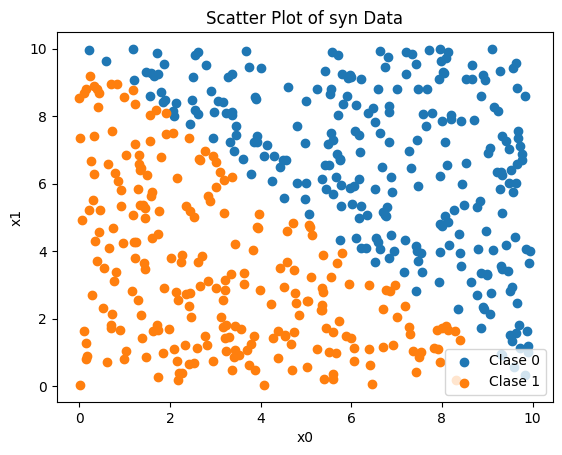

'\nplt.scatter(Xs[\'x0\'], Xs[\'x1\'],  c=ys, label="Clase 0")\nplt.scatter(Xs[\'x0\'], Xs[\'x1\'],  c=ys, label="Clase 0")\nplt.xlabel(\'x0\')\nplt.ylabel(\'x1\')\nplt.title(\'Scatter Plot of syn Data\')\nplt.legend()\n#plt.legend(ys)\nplt.show()\n'

In [27]:
mask_0 = ys == 0
mask_1 = ys == 1

plt.scatter(Xs[mask_0]['x0'], Xs[mask_0]['x1'], label="Clase 0")
plt.scatter(Xs[mask_1]['x0'], Xs[mask_1]['x1'], label="Clase 1")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Scatter Plot of syn Data')
plt.legend()
#plt.legend(ys)
plt.show()

"""
plt.scatter(Xs['x0'], Xs['x1'],  c=ys, label="Clase 0")
plt.scatter(Xs['x0'], Xs['x1'],  c=ys, label="Clase 0")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Scatter Plot of syn Data')
plt.legend()
#plt.legend(ys)
plt.show()
"""


In [28]:
pt=DecisionTreeClassifier()

In [29]:
pt.fit(Xs,ys)


DecisionTreeClassifier()

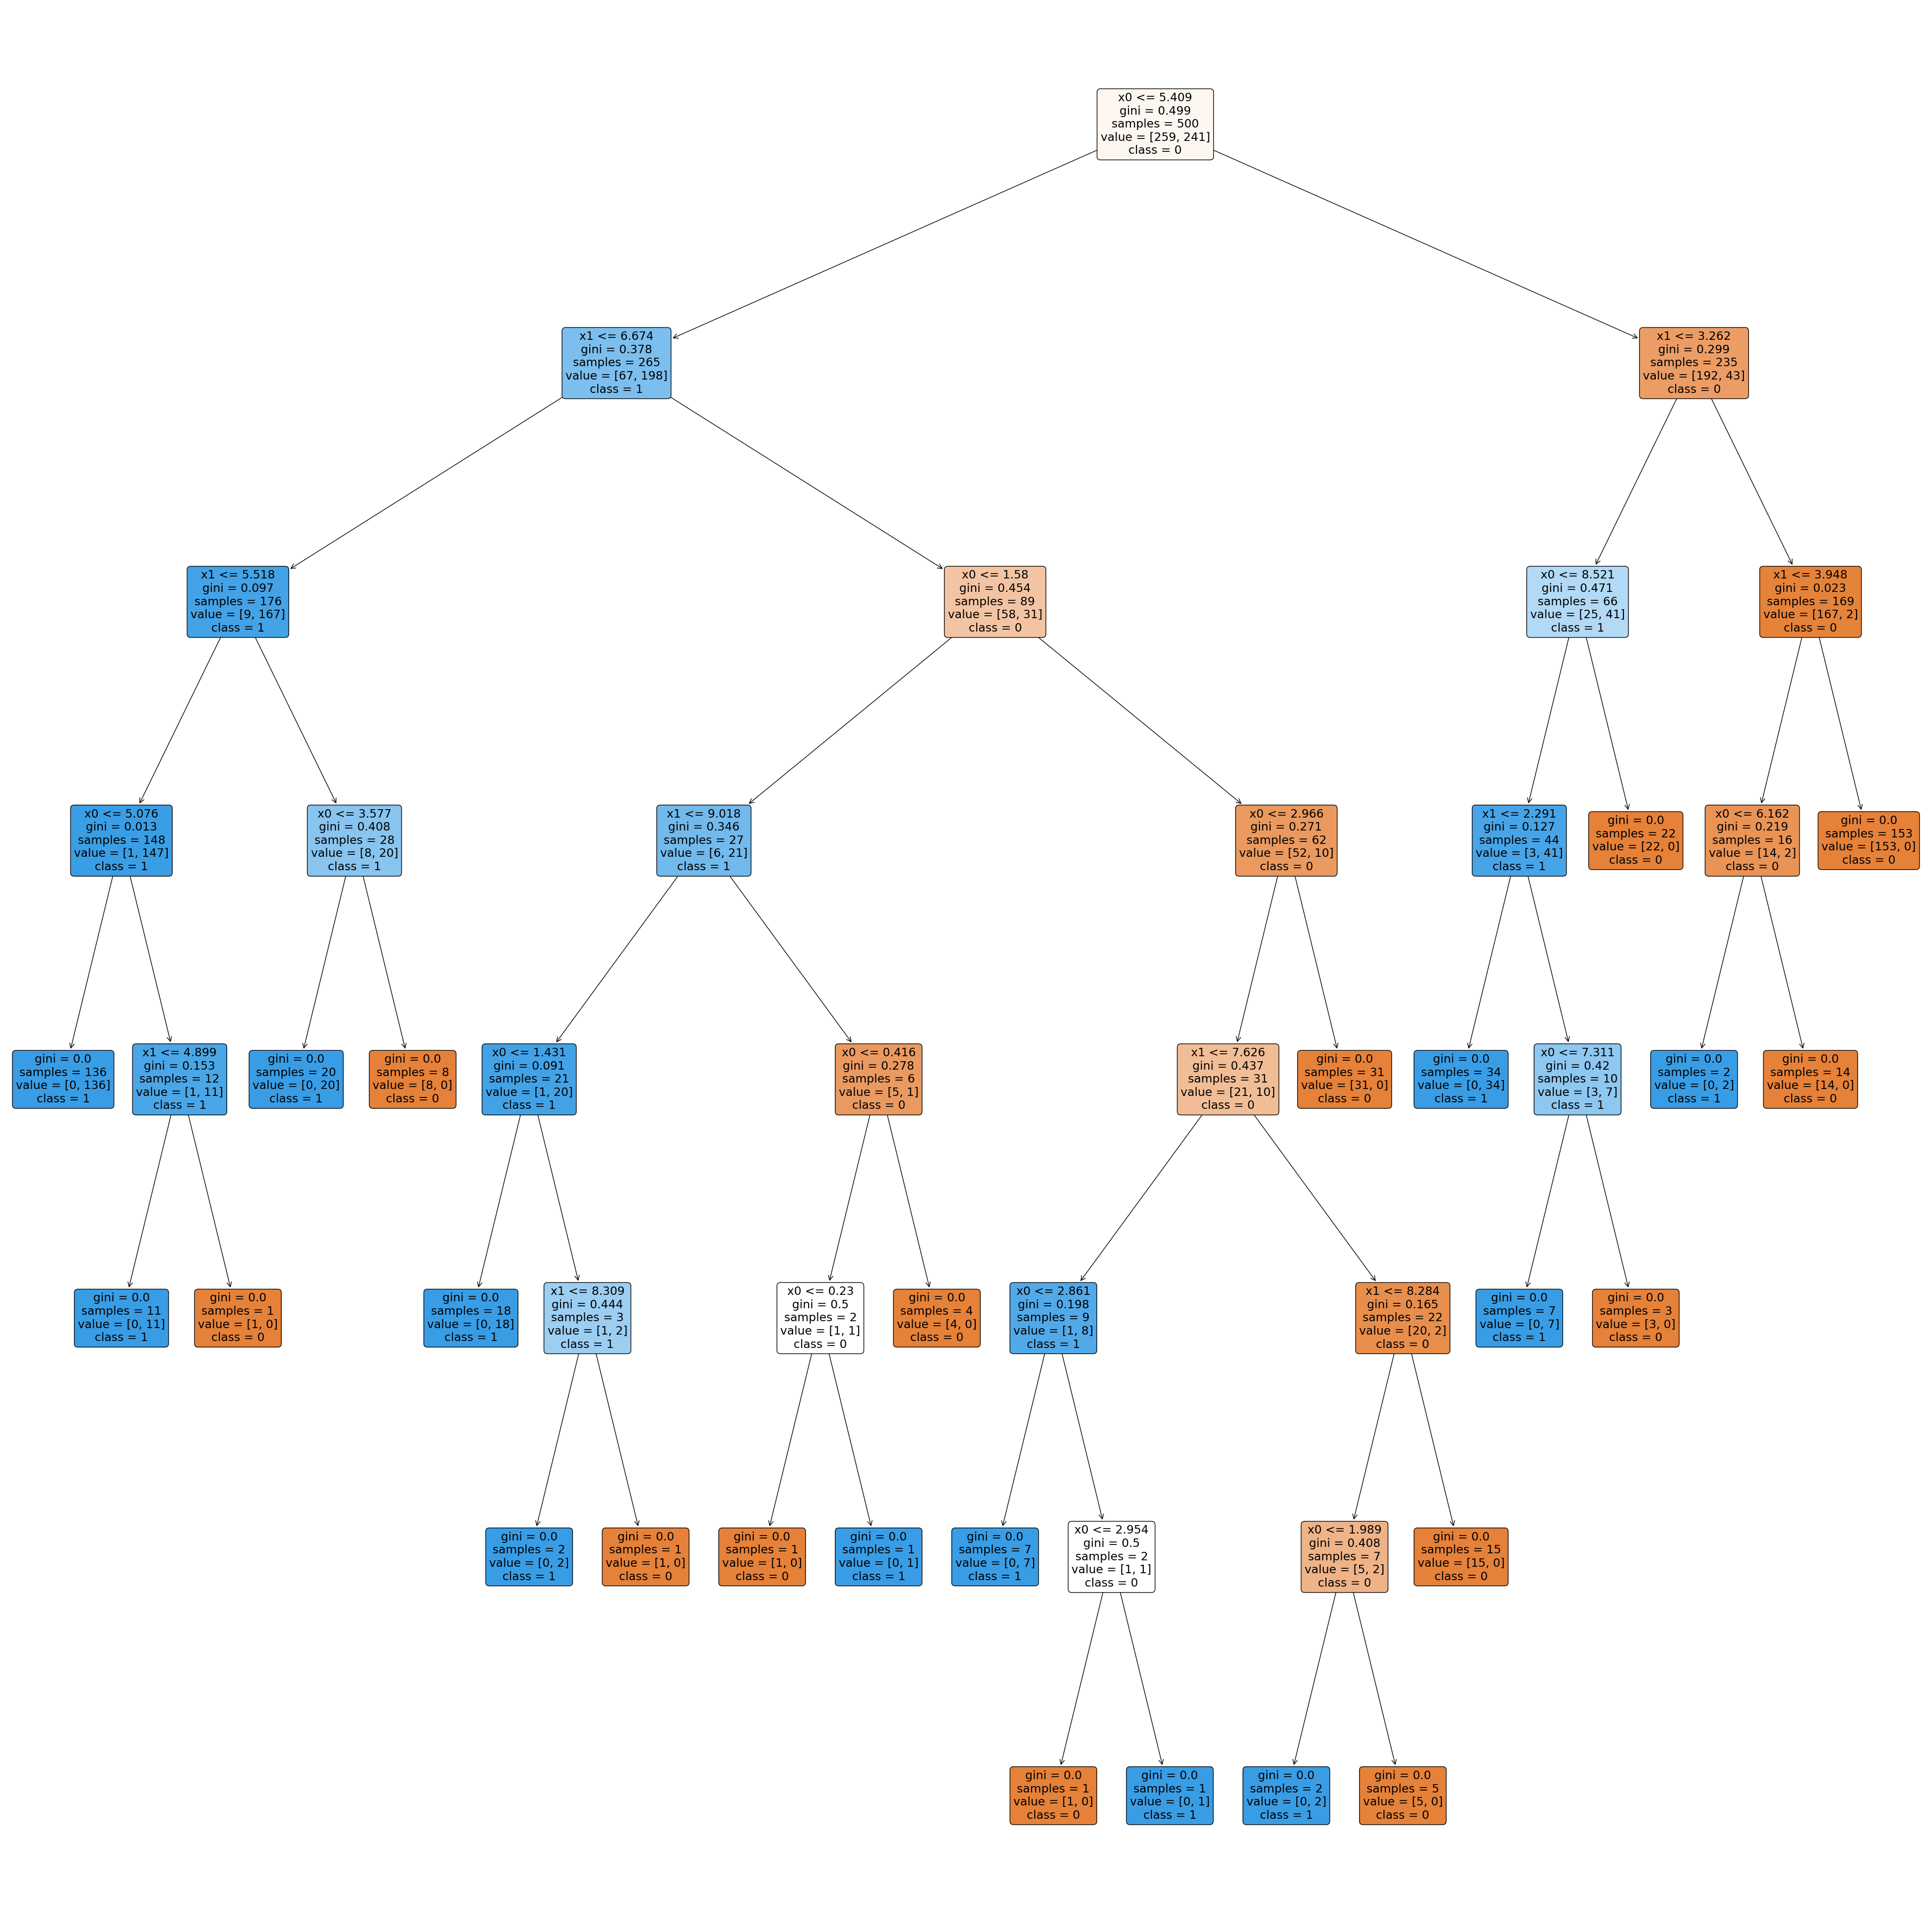

In [30]:
plt.figure(figsize=(50, 50))
plot_tree(pt, filled=True, feature_names=['x0','x1'] , class_names=['0','1'], rounded=True)
plt.show() #The tree is learning the division of the data



In [31]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")
X = dataset["data"]
y = dataset["target"]


In [32]:
#Load the MNIST dataset into memory. Divide the 70,000 digits you have into a training set (60,000
#digits) and a test set (10,000 digits)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=10000)

In [33]:
a=DecisionTreeClassifier()

In [34]:
a.fit(X_train,y_train)
y_pred=a.predict(X_test)
accuracy_score(y_test,y_pred)

0.8699

In [35]:
X1.shape[0]

178

In [36]:
class MyRandomForestClassifer():
    def __init__(self,n_estimators,max_feautures):
        self.n=n_estimators#This is the number of trees used
        self.f=max_feautures#The max_feautures are based on the size of the subset of feautures, will be selected to make the split
        self.random_forest=[]

    #train the trees of this random forest using subsets of X (and y)

    def fit(self,X,y): #each n_estimator will have its own subset of data 
        import random as rn
        from math import ceil

        for i in range(self.n):
            # Let's sample the training set
            sample_indices = np.array(np.random.choice(ceil(X.shape[0] * 0.632), X.shape[0], replace=True))
            print(sample_indices)
            X_train_temp = X.loc[sample_indices] #The x is filtered by the sample N and B
            y_train_temp = y.loc[sample_indices]

            self.random_forest.append(DecisionTreeClassifier(max_features=self.f).fit(X_train_temp,y_train_temp))

        return self

    #predict the label for each point in X
    def predict(self,X): #each n_estimator must make a prediction
        from collections import Counter
        #the class selected by the highest number of trees is selected
        predictions = np.array([decision_tree_fitted.predict(X) for decision_tree_fitted in self.random_forest]).T
        final_predictions = [Counter(prediction).most_common(1)[0][0] for prediction in predictions]
        
        return 
    #np.array(final_predictions)

        

In [37]:
a=MyRandomForestClassifer(n_estimators=10,max_feautures=6)

In [38]:
X_train.loc[[20,21,26]]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
a.fit(X_train,y_train)

[17579 26227 29819 ... 23223 10377 28272]


KeyError: '[30690, 2345, 15349, 9515, 3593, 28774, 33846, 23756, 26388, 35503, 22531, 29261, 37404, 7950, 14055, 30124, 35887, 7123, 14432, 1805, 37629, 26128, 34135, 19824, 5756, 19187, 36760, 5085, 3572, 23820, 22328, 24746, 22856, 32045, 25685, 13251, 34285, 29340, 32140, 3445, 37460, 23538, 28803, 4201, 31128, 24305, 33062, 6083, 32404, 29042, 92, 122, 29003, 17136, 2148, 24313, 8233, 10662, 29603, 6708, 34089, 21219, 34772, 34797, 2879, 23419, 24003, 8340, 8123, 2272, 8067, 791, 5423, 18740, 1600, 30156, 7581, 28534, 29751, 3070, 8583, 30413, 35531, 21233, 26863, 16325, 17071, 16710, 25723, 7768, 18537, 17899, 22214, 16680, 32892, 9076, 12395, 37726, 34367, 23015, 12851, 2438, 2762, 23952, 6905, 33982, 22173, 786, 30691, 25380, 4776, 10420, 21066, 21606, 6439, 26406, 10472, 28322, 2838, 21305, 20122, 12135, 29268, 17696, 18228, 13824, 21535, 18818, 2703, 28543, 29937, 4295, 5679, 9985, 34052, 21674, 16172, 10369, 19894, 4876, 37496, 30119, 32193, 8138, 6014, 7910, 27175, 16505, 7660, 5146, 1216, 15744, 14906, 28364, 4514, 17184, 33241, 13055, 32818, 15654, 2881, 6566, 37142, 14364, 22038, 34686, 12441, 34886, 33266, 20211, 37326, 29169, 15289, 7648, 4937, 36810, 5965, 25010, 18422, 31490, 8437, 30223, 29560, 32264, 24823, 27672, 1682, 33655, 2662, 15097, 11039, 13913, 37884, 22682, 8842, 1955, 7162, 29731, 9294, 13263, 1574, 27578, 32769, 10948, 16032, 33896, 6926, 18245, 12040, 28973, 12265, 17464, 27464, 9512, 31475, 3336, 15275, 9614, 23350, 29332, 26763, 22702, 20783, 6650, 9317, 27374, 24272, 25883, 31970, 26265, 25431, 649, 36360, 36378, 8595, 19800, 31628, 24846, 19714, 24382, 11338, 36361, 2064, 15928, 17079, 19706, 33966, 35085, 26813, 24730, 10193, 14783, 30528, 19653, 13610, 26439, 1175, 3460, 29586, 37902, 16977, 36329, 25517, 2678, 22556, 19725, 30787, 37510, 37449, 26321, 5083, 16848, 5202, 32272, 13321, 8325, 22577, 27953, 17911, 29353, 25148, 14610, 18809, 18445, 20831, 19611, 34161, 17904, 10355, 3167, 21169, 3249, 11952, 19896, 15849, 2299, 12208, 19934, 7721, 33797, 19742, 35155, 12056, 15067, 9201, 9371, 37033, 13789, 26060, 13349, 35527, 16358, 18417, 15828, 11122, 15897, 37302, 6429, 15283, 27653, 15137, 20049, 3157, 20207, 15253, 24559, 37667, 25219, 2322, 35103, 23164, 19951, 28653, 8444, 16115, 29717, 8592, 36136, 2538, 36555, 3380, 12552, 32650, 36928, 36215, 1386, 21973, 15369, 2026, 37045, 7706, 411, 23846, 2936, 31427, 4892, 10372, 2248, 19550, 26923, 17432, 7170, 13226, 24076, 21799, 32323, 33847, 35026, 16998, 8144, 27200, 1627, 13505, 10061, 31941, 16030, 9139, 9024, 23079, 14617, 5346, 32948, 21424, 27266, 10275, 10235, 24115, 29947, 29689, 15653, 25638, 8545, 16185, 33758, 26173, 22434, 18808, 14410, 19837, 16431, 14243, 25695, 6470, 16332, 10382, 35686, 25960, 23987, 16394, 17054, 8934, 26233, 14067, 34226, 26715, 34730, 30149, 33446, 6139, 12100, 2751, 23284, 2564, 9825, 2380, 28587, 10296, 20766, 24075, 18343, 14701, 31451, 2889, 6172, 31655, 36870, 4130, 25760, 18439, 29868, 30429, 36297, 24464, 573, 30341, 35679, 16524, 7705, 30657, 21254, 15829, 36661, 4589, 25313, 32096, 5824, 6506, 19699, 26964, 28870, 13476, 29795, 37893, 21656, 7852, 10983, 34671, 6940, 19828, 16497, 31151, 8001, 2904, 18329, 29355, 12848, 13498, 24187, 9702, 9889, 27292, 4558, 4746, 22462, 25333, 10252, 3121, 20676, 22493, 31987, 8780, 35506, 31087, 25746, 18089, 4831, 19510, 4822, 33859, 8711, 12722, 24983, 24152, 2947, 11064, 15743, 15821, 10506, 1943, 23103, 20894, 1735, 9468, 17918, 25003, 37581, 18430, 24765, 15356, 24162, 19439, 32712, 29718, 18025, 13707, 31861, 20111, 14476, 13034, 17130, 24218, 28686, 26284, 13072, 27927, 36396, 19294, 11376, 7066, 28513, 34651, 3027, 30580, 17647, 24718, 29425, 21904, 4308, 25166, 7438, 9645, 5806, 30660, 21571, 18302, 19472, 32497, 24339, 20510, 27413, 23789, 5818, 3297, 14585, 6193, 19352, 26549, 17066, 31587, 24686, 25080, 22113, 32672, 864, 28479, 16142, 33802, 36759, 31543, 13936, 6476, 3102, 11929, 4576, 23442, 17206, 30051, 19153, 29196, 31918, 31980, 21449, 12814, 15407, 22055, 26841, 18211, 12412, 11556, 2529, 10593, 28536, 27248, 22018, 14216, 8728, 18602, 6065, 3731, 309, 25337, 11093, 6574, 5192, 18691, 15381, 12110, 17241, 36237, 3875, 31344, 7011, 33168, 3, 18080, 31280, 22853, 22233, 31920, 1994, 37615, 5787, 23957, 27910, 13428, 10177, 34258, 641, 17650, 11412, 32916, 13755, 18673, 28577, 12597, 17127, 22450, 26757, 33262, 25422, 19067, 7199, 26649, 1988, 14032, 34227, 11526, 11283, 17227, 25772, 11002, 10914, 27378, 13688, 4718, 3017, 24268, 30035, 1616, 11100, 22954, 6238, 25780, 6994, 26075, 11374, 13289, 13071, 28139, 11459, 19882, 21977, 2767, 1968, 16133, 20189, 16991, 37193, 2404, 9253, 26165, 29220, 5370, 2791, 5982, 9740, 4069, 14030, 8029, 29341, 13491, 31224, 37437, 3437, 30712, 33435, 4070, 1352, 6220, 37108, 22635, 20371, 28557, 3025, 18175, 10490, 19031, 14962, 24391, 3937, 20644, 33593, 21480, 19506, 11572, 37049, 21678, 108, 36324, 31602, 4288, 17020, 23895, 5170, 7437, 2727, 7396, 20806, 10195, 3265, 18968, 22993, 32621, 11824, 13741, 11568, 37827, 4676, 10801, 15076, 15126, 17978, 32199, 4592, 5124, 22889, 7028, 17050, 25271, 5257, 27283, 27759, 20585, 11527, 22744, 25552, 21978, 21638, 17024, 1092, 21946, 12971, 9788, 2535, 1027, 8034, 1854, 3833, 26955, 32945, 35431, 13271, 30172, 33989, 4608, 35162, 26132, 1493, 27540, 10338, 7798, 37610, 17359, 1540, 29324, 4093, 22242, 11855, 17232, 16338, 1586, 896, 28447, 5646, 22814, 13793, 27383, 23487, 5571, 6076, 23092, 31969, 11441, 2808, 33661, 37232, 2782, 17327, 35636, 36453, 18028, 3474, 32791, 71, 27990, 9538, 16422, 2601, 27972, 13677, 17524, 2981, 34043, 30799, 27843, 24925, 32112, 18831, 15676, 18630, 29613, 37508, 14213, 17843, 11730, 29386, 18961, 2421, 28518, 16454, 19482, 8020, 37698, 10257, 32920, 14669, 34414, 8270, 27620, 26236, 33, 31780, 3502, 12798, 15368, 32536, 18877, 24244, 22165, 30901, 19846, 2219, 27534, 20841, 2908, 3326, 10840, 29990, 5046, 7991, 37798, 20487, 19648, 36100, 24829, 37290, 17111, 12252, 35057, 24954, 24682, 20529, 24677, 15857, 23009, 9457, 37809, 17102, 15997, 33955, 6600, 29896, 22690, 36017, 10795, 3014, 22483, 5072, 389, 34039, 5415, 34558, 15559, 30992, 32841, 811, 23591, 35304, 9674, 17123, 8689, 9855, 32538, 36095, 12534, 21400, 24602, 8260, 6546, 11433, 32677, 37414, 13125, 14489, 5504, 31910, 31136, 30086, 29492, 242, 5490, 28508, 28505, 33033, 7509, 27542, 6712, 25301, 36753, 18624, 22611, 8591, 6414, 22211, 25088, 1538, 21612, 7498, 4918, 14494, 4830, 7755, 20887, 5783, 4047, 35441, 20906, 24808, 20621, 34563, 6007, 26659, 3550, 32061, 11873, 23537, 33876, 36245, 14460, 29047, 20684, 37552, 28917, 30407, 10987, 8102, 4470, 9257, 28027, 30479, 14920, 25013, 3285, 6071, 5558, 12400, 14496, 37285, 21002, 28859, 4269, 288, 2531, 15318, 2405, 31509, 2586, 13703, 6296, 6233, 28261, 17940, 10988, 3303, 9737, 33233, 21093, 27942, 22615, 23481, 4120, 4942, 34940, 25887, 22180, 28899, 13248, 28162, 34659, 29916, 22961, 5591, 2489, 3294, 4435, 20693, 37806, 26116, 28227, 30394, 20527, 10456, 3454, 20004, 13444, 9733, 36154, 17643, 10809, 30049, 3434, 27049, 23604, 22887, 36234, 17745, 16210, 23500, 6603, 33349, 20869, 18407, 2487, 26376, 3004, 19191, 15806, 33871, 16906, 20457, 21360, 34163, 26207, 19030, 1016, 35850, 1504, 2241, 19858, 30526, 7103, 10104, 26472, 1353, 3024, 26929, 21033, 28585, 22748, 30868, 28369, 15384, 31783, 24160, 29671, 12753, 1645, 2714, 22272, 28758, 17142, 31536, 11238, 10889, 7765, 28456, 27903, 27709, 10223, 35744, 17943, 5148, 23596, 6402, 1734, 31015, 6672, 15298, 31948, 6323, 21668, 746, 36559, 30640, 7647, 5452, 2705, 10954, 6751, 13560, 16654, 1843, 28082, 19785, 36262, 23863, 29321, 5485, 26066, 31183, 27580, 24809, 6983, 32973, 37040, 4731, 12846, 34171, 4939, 2983, 13202, 189, 26931, 17213, 7629, 22627, 6910, 21045, 37130, 36472, 305, 15376, 33539, 21851, 37504, 13470, 11311, 29984, 5292, 801, 24647, 4033, 6524, 32530, 7057, 29463, 2361, 8885, 18900, 36778, 18530, 32439, 30111, 34076, 22582, 34799, 3975, 5884, 36246, 3624, 27923, 16506, 25651, 6290, 36050, 21144, 2081, 22276, 409, 5511, 6565, 12361, 22428, 33449, 23121, 3403, 7125, 27825, 18446, 25004, 31309, 5582, 32399, 26530, 29589, 14450, 6809, 10546, 16733, 17812, 27339, 26943, 13350, 35252, 14398, 15532, 3481, 35438, 19258, 33956, 24155, 5666, 35727, 11407, 29999, 16328, 21277, 23113, 3243, 22866, 29591, 13609, 3329, 35216, 6973, 5694, 21059, 15398, 37401, 1925, 25679, 35684, 14185, 34202, 26744, 27396, 26198, 28229, 10782, 10621, 13522, 26043, 19563, 37188, 15157, 11619, 35250, 251, 7939, 15747, 34044, 21662, 8189, 13607, 37268, 12954, 14313, 5388, 37910, 616, 21749, 6509, 28968, 7082, 25876, 326, 13804, 16933, 22977, 1794, 26981, 12232, 23357, 279, 8599, 34296, 1128, 4737, 21354, 27122, 34319, 1363, 23673, 7266, 7179, 12530, 30774, 23711, 31243, 16381, 6317, 31456, 18143, 9209, 21592, 918, 26716, 18583, 26683, 18845, 26002, 9858, 25714, 16611, 846, 15416, 4206, 19473, 11009, 12770, 2220, 24071, 36208, 11211, 32154, 25594, 30115, 15123, 10622, 36610, 4819, 31023, 856, 13654, 5737, 13337, 32004, 21988, 10199, 14516, 11544, 29168, 6448, 7764, 3878, 17845, 33546, 3470, 4991, 26802, 28478, 15466, 27167, 12782, 30411, 29011, 36794, 3864, 1173, 10863, 16599, 1726, 608, 7075, 30570, 27630, 6119, 20027, 22286, 18020, 17460, 6367, 7515, 35969, 23943, 3246, 24204, 31449, 13865, 23001, 4211, 11447, 31065, 37080, 30330, 31139, 31606, 4749, 9408, 3850, 20512, 31708, 30545, 26779, 27891, 34261, 5979, 34726, 13499, 3554, 1437, 1305, 3752, 22037, 7094, 4399, 26535, 392, 19418, 7643, 6624, 11010, 34130, 22580, 4596, 37094, 35023, 12568, 16437, 3458, 4038, 36265, 21207, 4911, 19540, 17122, 2774, 15226, 14960, 17436, 19, 9998, 637, 23387, 24416, 18057, 16830, 5899, 16481, 31982, 3462, 19543, 37675, 31503, 4425, 16421, 22944, 23594, 27142, 33841, 9743, 34762, 20210, 7015, 20981, 14078, 27555, 12059, 30100, 14696, 762, 29932, 31140, 37668, 21881, 15414, 34255, 155, 26489, 34874, 26070, 37490, 9659, 7071, 32571, 16293, 21714, 19737, 3610, 8249, 35649, 22449, 35933, 22256, 1250, 6593, 11923, 34378, 12620, 24255, 14854, 17737, 501, 34232, 37180, 5793, 4745, 22216, 264, 13222, 15987, 14785, 35128, 14422, 35716, 9436, 29913, 26823, 31532, 25885, 26443, 12388, 15613, 16739, 17532, 31680, 14820, 23184, 11076, 36211, 33948, 32008, 17151, 30037, 20354, 23499, 3883, 25304, 31990, 31732, 23795, 10932, 34100, 9235, 26852, 8695, 4465, 30027, 27299, 27764, 35181, 15731, 26228, 1359, 12752, 4824, 19716, 33614, 34113, 14720, 8714, 23378, 13261, 26977, 28157, 6291, 12598, 19318, 6430, 29956, 20456, 22596, 24483, 23082, 35363, 34120, 33006, 3478, 27904, 36786, 23950, 30697, 36604, 3656, 8838, 18239, 27240, 2590, 21552, 20631, 2456, 18464, 20838, 36433, 7228, 21620, 21929, 2823, 7005, 5567, 3682, 29639, 4015, 11995, 18789, 2628, 11364, 26069, 13343, 16939, 7062, 2989, 37469, 28280, 30964, 27123, 31937, 29393, 5492, 17484, 20820, 10794, 14938, 34872, 26098, 9015, 509, 17352, 26482, 24343, 4071, 16632, 1793, 6164, 11349, 34656, 7725, 9962, 26192, 19724, 36233, 6401, 4459, 28203, 33293, 21697, 8501, 16913, 37445, 18379, 33206, 29567, 16025, 2724, 10552, 28530, 18369, 36471, 7551, 15485, 31594, 8845, 24473, 7273, 16213, 5112, 17034, 18272, 25581, 6264, 20401, 17590, 7315, 30248, 19209, 5214, 30169, 19598, 26942, 21266, 7221, 34572, 9282, 36223, 18327, 22446, 21998, 15896, 13603, 20563, 23808, 29809, 26516, 21195, 972, 32306, 28472, 10231, 29580, 10301, 37750, 19555, 6854, 32178, 6468, 5176, 740, 6541, 13126, 17712, 30114, 25048, 11358, 23380, 3941, 13682, 9792, 10403, 11915, 7947, 618, 37012, 26876, 16430, 11810, 19372, 24796, 31033, 21590, 28114, 31048, 23168, 6256, 2769, 23763, 5853, 37843, 25801, 3186, 18067, 10543, 10904, 37344, 34952, 14321, 9624, 19850, 26152, 1785, 19874, 14324, 20851, 1653, 33053, 8793, 24330, 20428, 27871, 6550, 25342, 25289, 7297, 6683, 12081, 34298, 16026, 34620, 5142, 22835, 13814, 20462, 34542, 24280, 34391, 13390, 685, 6510, 4616, 13709, 15149, 8040, 28012, 28331, 16748, 36187, 5870, 12553, 243, 16111, 9061, 2822, 28540, 9091, 1601, 17056, 26209, 11553, 29902, 30146, 15790, 37014, 6199, 22420, 29640, 5322, 36155, 33288, 15179, 29360, 6857, 18, 28489, 2726, 35343, 28065, 5307, 19341, 28556, 1336, 17754, 9499, 32779, 8725, 627, 23302, 16302, 12187, 18565, 12706, 32701, 24413, 17037, 31278, 31276, 20765, 11794, 16260, 25403, 1639, 36951, 33050, 11471, 18249, 23546, 2459, 1245, 32575, 31057, 25298, 22159, 31232, 33680, 15837, 27999, 19719, 32913, 319, 1277, 13183, 1139, 11694, 23245, 1187, 25101, 31288, 7649, 7561, 6039, 26301, 8302, 37380, 10021, 32440, 27116, 13394, 13027, 22967, 5891, 16584, 959, 18796, 19409, 22202, 33127, 29414, 23906, 36901, 1124, 14944, 17489, 20844, 9142, 17557, 37, 511, 19068, 557, 24073, 15301, 26224, 21863, 12818, 16791, 36204, 26853, 13648, 31317, 4037, 425, 24154, 18996, 586, 9407, 32543, 21140, 20066, 12185, 1392, 29252, 20678, 21052, 30485, 20313, 7318, 31773, 21335, 18141, 22288, 27634, 10451, 6562, 6300, 9346, 10013, 32298, 26062, 14753, 32463, 24875, 24488, 24900, 648, 686, 1286, 25084, 24104, 22763, 27159, 14589, 1420, 22027, 28762, 18279, 5130, 9827, 36792, 13540, 22141, 9426, 28654, 17519, 14809, 29878, 19558, 2090, 24502, 31705, 30122, 37790, 30813, 33312, 15014, 32412, 31659, 15748, 19948, 5195, 10236, 13508, 1197, 7398, 11482, 6977, 23838, 7367, 37596, 18798, 14504, 8353, 2, 25721, 18949, 26093, 25526, 21308, 23329, 33475, 28830, 3476, 37214, 4157, 1482, 22966, 19942, 19394, 17562, 5061, 7655, 24836, 11377, 25387, 7339, 21404, 19570, 29558, 1115, 4516, 12368, 31363, 16103, 5758, 13437, 17423, 30902, 21486, 27633, 11702, 37676, 21625, 25285, 11043, 25461, 27188, 32567, 29936, 5144, 16692, 37775, 27263, 1133, 3675, 33333, 22010, 24532, 31334, 22793, 13785, 22939, 35562, 31311, 37580, 29652, 18512, 29455, 8598, 110, 2288, 23784, 10697, 14237, 8318, 21089, 37511, 1539, 33750, 14716, 9428, 27040, 12314, 25540, 37638, 8350, 30861, 11906, 37621, 17259, 19262, 36377, 1635, 15975, 5448, 14548, 31806, 3803, 19243, 18075, 7543, 13723, 33916, 4316, 37138, 37348, 11153, 23253, 25843, 28010, 25545, 2313, 33023, 16940, 24415, 34062, 26519, 9906, 9319, 13627, 33622, 26189, 704, 6538, 27397, 34346, 24469, 25350, 20140, 34793, 23879, 23310, 30496, 32499, 31575, 29148, 29125, 20105, 19761, 10928, 13826, 16876, 13769, 23462, 24872, 1391, 16321, 23901, 1683, 16956, 13845, 20712, 36404, 35692, 13223, 19090, 20408, 16407, 37181, 33538, 23351, 17954, 7140, 33263, 1625, 9662, 32095, 30776, 13969, 9739, 3600, 16271, 37170, 33707, 4646, 14800, 20793, 22351, 29266, 34580, 15052, 9449, 11974, 29214, 436, 37828, 15907, 12921, 33056, 26509, 36421, 6608, 14282, 2323, 19390, 23483, 17304, 1722, 32639, 17224, 32794, 19172, 24858, 33596, 20343, 3532, 35758, 19855, 25495, 22009, 18923, 14875, 6891, 14459, 3985, 4426, 11966, 29654, 16352, 26592, 31652, 4532, 10659, 19144, 30103, 32579, 31260, 20145, 9650, 37562, 10368, 21857, 6160, 25608, 25483, 18514, 26336, 35119, 35134, 12797, 9444, 25188, 974, 4965, 13140, 2626, 27147, 4075, 19917, 22229, 30615, 16782, 10994, 14197, 31653, 35043, 14437, 9283, 8684, 25934, 26196, 8297, 13680, 16228, 35368, 32987, 12654, 12609, 11935, 27435, 14188, 22484, 24962, 29745, 897, 19213, 410, 3202, 13557, 5210, 14996, 10, 7435, 23037, 34121, 36138, 32796, 32742, 25061, 16313, 35174, 30152, 28149, 5396, 4133, 23341, 37859, 30939, 1666, 10751, 10401, 18467, 28773, 23046, 33467, 15190, 22574, 4548, 29980, 2247, 26171, 17499, 5001, 5926, 30569, 1324, 6840, 6816, 7001, 13315, 23845, 20412, 21618, 14724, 5601, 29243, 23552, 16177, 37745, 36143, 18774, 4995, 19620, 26096, 14326, 16751, 1694, 4101, 8072, 11781, 12350, 37320, 27840, 4817, 9536, 1433, 20448, 4478, 37534, 13691, 29801, 32082, 4940, 18183, 26372, 15515, 26039, 9663, 20406, 15838, 21151, 33387, 3954, 5753, 34798, 31251, 31704, 34844, 33331, 6663, 36518, 22838, 25402, 11352, 15036, 5586, 10494, 24316, 31798, 22101, 15117, 19176, 4750, 32329, 16629, 29768, 36616, 7819, 9042, 12261, 12545, 25765, 28273, 6454, 14046, 22391, 26175, 8832, 16146, 25759, 12436, 34300, 10124, 7316, 14284, 20919, 2073, 12154, 14373, 22310, 15990, 12377, 20695, 29931, 24620, 22515, 8429, 36420, 9145, 10062, 82, 22195, 27892, 27287, 14276, 25170, 18076, 15986, 26078, 29022, 4417, 24077, 24161, 37487, 31084, 4468, 11738, 27059, 24360, 12363, 12033, 3293, 14784, 2303, 34466, 10360, 31339, 9695, 1472, 35973, 15778, 31250, 1068, 30833, 25694, 20773, 6462, 4542, 1914, 1008, 25597, 23581, 11405, 26866, 17616, 15116, 8913, 10333, 23405, 14975, 16542, 20469, 9531, 9727, 26545, 17218, 10152, 8027, 26875, 2274, 1103, 4337, 5785, 9933, 12124, 17244, 5680, 5827, 21751, 17414, 74, 19435, 8924, 29484, 7264, 17168, 10149, 12974, 11868, 28192, 32308, 23560, 26674, 27660, 29929, 9912, 3808, 4770, 22051, 35006, 25261, 28123, 147, 22306, 21902, 13293, 76, 28778, 37262, 9196, 9003, 11072, 10943, 334, 21882, 6902, 30775, 17627, 36090, 164, 12034, 8303, 37753, 11573, 12364, 4741, 21832, 12919, 16039, 11264, 16061, 2199, 23061, 25172, 21728, 25435, 7934, 5811, 16596, 35104, 15542, 35429, 35511, 8288, 1171, 25277, 2902, 28042, 31089, 36769, 21560, 3830, 34777, 48, 33325, 35318, 28402, 36834, 20613, 6288, 5716, 30193, 7535, 34046, 34720, 10170, 35110, 19065, 2725, 5690, 13828, 1167, 15468, 10306, 7608, 11891, 5436, 35614, 14633, 6861, 30781, 35983, 28151, 13211, 35222, 24421, 33651, 24863, 1631, 13392, 7237, 1267, 1339, 26598, 2671, 21729, 10869, 26953, 5977, 16796, 7070, 20627, 30237, 19274, 5293, 31998, 37190, 11946, 34276, 9992, 26982, 31255, 8030, 14293, 943, 7314, 23292, 21704, 20215, 28387, 21990, 32890, 30378, 7500, 7603, 25896, 32437, 10397, 19589, 29186, 2010, 17500, 3302, 11815, 23151, 20567, 27637, 7530, 17533, 10913, 5299, 27497, 35708, 37578, 19009, 32844, 23659, 600, 20599, 36710, 36776, 2363, 20521, 1634, 31596, 36956, 29249, 25279, 22213, 8245, 34868, 33016, 562, 18844, 9352, 30353, 7137, 1456, 33350, 22526, 29019, 27738, 29707, 1568, 23561, 18054, 32447, 11498, 10276, 27600, 20778, 33853, 21170, 2143, 4535, 2367, 16721, 18486, 20444, 2756, 11294, 12294, 36526, 17571, 4738, 20591, 4455, 13209, 12339, 6356, 17777, 12428, 32748, 18745, 20629, 2396, 6933, 33370, 33777, 36851, 31892, 5878, 35907, 3738, 1800, 6024, 31425, 10025, 18023, 35160, 18097, 29811, 30484, 9984, 28932, 24258, 27510, 3371, 26735, 4252, 7479, 20657, 17047, 33165, 26080, 10325, 24043, 27707, 12112, 16486, 247, 34399, 36414, 36697, 13181, 36756, 16869, 23825, 9551, 7928, 20918, 1588, 31912, 19713, 29129, 13408, 24567, 15446, 6734, 1756, 5681, 6372, 37383, 11559, 24093, 14393, 14236, 35525, 34551, 24139, 14181, 26682, 33740, 19660, 22356, 23769, 17487, 26935, 19655, 4801, 11462, 18332, 18375, 19157, 15176, 26967, 11389, 10091, 11126, 37678, 34195, 7343, 9273, 22764, 13114, 22617, 13689, 2675, 2602, 5578, 34976, 20237, 10643, 21076, 28175, 5628, 32991, 25136, 31134, 19152, 2039, 7685, 19071, 22592, 3192, 35168, 14827, 18563, 26971, 8194, 18352, 21321, 7092, 16636, 25108, 21160, 15604, 36338, 13175, 3536, 16415, 32508, 33184, 5095, 23928, 27361, 13319, 7230, 4450, 24202, 11058, 31537, 141, 5023, 2300, 10849, 16225, 4192, 34481, 12572, 26669, 24644, 9466, 8372, 32897, 32419, 4189, 14080, 25019, 34569, 10959, 28365, 3863, 35581, 14480, 10134, 6336, 13460, 23624, 12067, 6684, 30648, 822, 11047, 32603, 17413, 4129, 7635, 6069, 24653, 35771, 20133, 34626, 35311, 28910, 31688, 30842, 16440, 9791, 14703, 26940, 37898, 31875, 15463, 28757, 20021, 19557, 21779, 2277, 28135, 4091, 21898, 13608, 17535, 15903, 28776, 33361, 26383, 34570, 3769, 30155, 16108, 21437, 12153, 34460, 29550, 26017, 24839, 3871, 8328, 11836, 10518, 37403, 24702, 30819, 7486, 1005, 4977, 15495, 19483, 4406, 10114, 32305, 22584, 21706, 5755, 21430, 36119, 17451, 27827, 20993, 1009, 16083, 8157, 7358, 3587, 7211, 21342, 32864, 4447, 35963, 15672, 12394, 15008, 27028, 8540, 36910, 999, 29259, 23891, 3438, 13376, 21861, 26785, 35067, 15285, 18729, 34650, 27772, 14947, 3365, 7496, 27821, 17989, 30903, 16151, 26706, 35929, 8153, 32291, 36838, 32165, 23399, 5489, 30000, 27847, 5751, 18289, 7003, 1852, 19232, 29121, 27095, 6915, 15957, 12224, 28282, 8530, 1269, 35364, 14420, 31058, 26933, 13459, 16092, 8387, 29461, 18420, 15206, 4266, 27290, 12914, 35919, 4799, 20891, 9637, 26780, 13548, 18154, 8947, 30851, 18833, 29330, 10361, 26833, 9239, 20569, 1168, 10673, 15940, 31866, 25151, 20912, 20973, 35064, 28226, 986, 16244, 6058, 32418, 27872, 15213, 27185, 1157, 17048, 23118, 30177, 8895, 11537, 2093, 20266, 12514, 35745, 2547, 2062, 4639, 3020, 33150, 35158, 27461, 24748, 3560, 26912, 15438, 33457, 22106, 3627, 20974, 24299, 10163, 17840, 28101, 14183, 25559, 3349, 14040, 37393, 2514, 33716, 6091, 25095, 4411, 25817, 26938, 37699, 36519, 32093, 23473, 1442, 1892, 16657, 23385, 20131, 9494, 34269, 36935, 13734, 12283, 36720, 27603, 6503, 26782, 17159, 1544, 14436, 17149, 12133, 10927, 28613, 25344, 10491, 25530, 18037, 30527, 32340, 28134, 32509, 26180, 13500, 34791, 9639, 6000, 16155, 10725, 33648, 9000, 35767, 24944, 31711, 37740, 37419, 15895, 25046, 12606, 23364, 22638, 20713, 2216, 27781, 20965, 11400, 37060, 6328, 29269, 29158, 36236, 2803, 26206, 19675, 6885, 31697, 25192, 27981, 3548, 26215, 25133, 1126, 19363, 3316, 14973, 16993, 32030, 31182, 17415, 7105, 18645, 26239, 36842, 16369, 28713, 13291, 26893, 13798, 14569, 1046, 16582, 32162, 31562, 21757, 28169, 34410, 6447, 3708, 33720, 22828, 26567, 8694, 23136, 9474, 2379, 33189, 21963, 18724, 28196, 15856, 13898, 1125, 16020, 26989, 35494, 27390, 21833, 9693, 19224, 12645, 2225, 4202, 6919, 12284, 3175, 32087, 5689, 36150, 14635, 30549, 22348, 11281, 31029, 18016, 5096, 24086, 19999, 7943, 33663, 4170, 33575, 11045, 9574, 25425, 35561, 27384, 26892, 4369, 269, 10274, 3544, 18618, 27187, 25154, 12401, 4507, 13083, 9440, 27192, 13101, 30537, 6703, 20828, 1778, 5872, 31111, 20302, 21624, 12573, 3068, 11630, 550, 24992, 7965, 3477, 21423, 35885, 5084, 12455, 35501, 22390, 33082, 18191, 28494, 24769, 1021, 34924, 14773, 4428, 29432, 15972, 35722, 25720, 5529, 9210, 20008, 3154, 16119, 17194, 16033, 33319, 33751, 28193, 7374, 26644, 6644, 26314, 17306, 14566, 30947, 19821, 20863, 32858, 27980, 5710, 17170, 25939, 10373, 29622, 4198, 20805, 13105, 35121, 32694, 7383, 13028, 9194, 19672, 19740, 4217, 29962, 17285, 19774, 8253, 29323, 22160, 15840, 31355, 33829, 17592, 6999, 16333, 21137, 1421, 14204, 22900, 13556, 29401, 8275, 5754, 8227, 35858, 13519, 7041, 29404, 37517, 168, 29551, 28549, 3531, 26534, 4573, 1134, 21914, 26619, 8755, 7411, 13817, 1655, 4226, 18633, 1110, 8911, 13564, 681, 24133, 4671, 6707, 23892, 2597, 14579, 29526, 7651, 29752, 24771, 1962, 11664, 15816, 25267, 36441, 19407, 14801, 10396, 34339, 35487, 3467, 22199, 27695, 15967, 32999, 7563, 10435, 8032, 29073, 7512, 7218, 17934, 3680, 27991, 32332, 19788, 8053, 30998, 30007, 35851, 13813, 8660, 1058, 27104, 9496, 23526, 34320, 10324, 15780, 2462, 15035, 7216, 2649, 4695, 10044, 28503, 22567, 26794, 3823, 34274, 37186, 7322, 33171, 9347, 37620, 2956, 21919, 7185, 25414, 34455, 20632, 34433, 33899, 29390, 1438, 17701, 7026, 17369, 26640, 7574, 36968, 36957, 30362, 10648, 13569, 20340, 21372, 9071, 19183, 5924, 31218, 20271, 1835, 9865, 4981, 16892, 258, 17837, 30860, 4712, 3542, 9150, 12349, 33933, 13292, 26465, 30473, 29418, 20035, 17626, 20619, 33378, 13472, 24411, 14467, 18376, 12760, 23693, 6679, 16005, 21841, 8522, 11019, 4196, 34850, 36446, 22422, 26499, 28837, 15706, 35449, 18642, 34447, 17851, 17805, 18595, 12908, 34825, 8700, 32649, 34184, 32214, 8874, 10126, 30372, 16235, 8208, 23850, 28037, 4073, 18695, 31387, 27439, 9577, 17379, 24058, 34678, 31234, 2458, 27607, 23004, 36316, 32216, 32898, 22863, 18619, 31067, 18079, 7932, 30329, 10608, 5553, 23818, 356, 8747, 22281, 6814, 32811, 20885, 11166, 15028, 3616, 6677, 19841, 10883, 27404, 10813, 30112, 14674, 36332, 37664, 32448, 32455, 13628, 11599, 36199, 25840, 14804, 845, 13151, 22648, 27330, 32164, 2003, 4246, 36480, 33311, 14989, 1399, 36689, 22654, 1447, 31293, 15282, 11366, 19651, 33623, 28460, 12644, 20935, 8492, 29210, 37215, 8756, 7408, 815, 8503, 28978, 11776, 17931, 33272, 20667, 20638, 19364, 17890, 11717, 10844, 5702, 27604, 14054, 37881, 18094, 18053, 32893, 12149, 33018, 27941, 21723, 17992, 1752, 10144, 34054, 28293, 18504, 37878, 37195, 70, 4871, 20758, 27863, 23786, 16062, 1894, 4627, 12538, 30551, 29027, 23968, 5425, 25771, 11796, 4343, 5182, 20747, 16908, 23396, 17864, 11876, 36598, 33407, 26588, 22225, 17523, 35732, 19003, 8246, 26748, 37253, 27029, 36632, 28442, 19350, 10888, 30530, 27995, 9427, 1104, 19066, 15267, 2202, 27344, 8086, 13161, 16288, 8641, 35938, 18192, 27224, 8801, 28735, 20742, 20336, 10958, 9557, 20230, 34598, 9354, 20617, 4829, 20672, 17808, 29406, 712, 32947, 1744, 22678, 33529, 25288, 4035, 29648, 33382, 20733, 19168, 15740, 10099, 27083, 14937, 1893, 15564, 37583, 19272, 33135, 4414, 16549, 2327, 17548, 14818, 28558, 13855, 24634, 28372, 9658, 18389, 2722, 29554, 13504, 7414, 19221, 29641, 10362, 24907, 2113, 34286, 35034, 19039, 11403, 24600, 21787, 16690, 1151, 7710, 26632, 18813, 30038, 35333, 16068, 21249, 6, 35578, 17030, 3298, 27723, 19042, 9993, 18637, 3100, 37899, 6197, 30444, 12965, 12850, 23172, 35256, 1288, 23719, 33624, 32352, 31535, 12245, 22503, 14257, 9007, 2293, 14128, 15518, 5290, 32392, 2020, 36640, 33849, 25592, 27359, 14840, 22861, 15081, 24250, 201, 34497, 18325, 10775, 22959, 18547, 35260, 25756, 24485, 1662, 5343, 31009, 26108, 32104, 30196, 1310, 31564, 469, 14120, 30392, 15659, 23096, 12209, 4863, 33492, 4448, 30347, 874, 27697, 32636, 6653, 3492, 19122, 32146, 33970, 27650, 10468, 6467, 34977, 25242, 17953, 14533, 3960, 23222, 6675, 31068, 16196, 7731, 22676, 20392, 29292, 17694, 10313, 14515, 31744, 15408, 15170, 9158, 32107, 33629, 29792, 12744, 9741, 8022, 19238, 17026, 10540, 4948, 7503, 34205, 12052, 31277, 24239, 34941, 35510, 3449, 32307, 31273, 25754, 32027, 17791, 37758, 4599, 2228, 14005, 28059, 27, 4848, 29087, 29136, 24055, 24640, 28488, 36608, 36244, 10975, 20543, 16953, 9297, 32924, 13197, 37287, 20357, 17564, 17407, 10383, 29116, 25268, 12094, 34356, 31204, 27753, 17457, 4076, 31286, 26312, 3040, 4318, 36724, 35866, 11332, 21830, 22687, 13100, 9747, 29354, 5398, 15704, 3574, 25878, 15104, 26965, 20946, 3576, 22049, 28794, 16153, 14093, 13277, 919, 28731, 25829, 26723, 4586, 22902, 21822, 31949, 37752, 24304, 17608, 28783, 314, 31083, 25225, 8286, 25480, 22583, 15533, 24611, 11483, 26824, 1890, 24847, 24461, 37407, 23923, 8263, 28146, 3980, 13724, 11490, 35239, 30424, 19745, 23667, 29155, 32242, 12333, 22439, 23280, 12698, 26006, 31416, 31228, 31495, 8942, 15174, 23736, 33597, 4084, 6802, 20056, 37317, 27006, 30299, 31428, 24837, 29788, 14207, 8917, 11361, 24803, 26349, 35072, 14609, 31079, 37765, 36390, 35030, 30744, 7494, 18173, 13278, 19533, 37579, 35136, 31180, 1326, 25317, 17781, 2004, 34884, 13309, 24061, 880, 11328, 5004, 11939, 23875, 29763, 5877, 34969, 36250, 36938, 27468, 33566, 15933, 23519, 34370, 20429, 7022, 20620, 19052, 31214, 21422, 31153, 26776, 11202, 34050, 31953, 6516, 35723, 16942, 27687, 24240, 35463, 22192, 7877, 12872, 15750, 22092, 9486, 18823, 33625, 15869, 8580, 25825, 3773, 14419, 21689, 27418, 16013, 29410, 5658, 13658, 10261, 8931, 30291, 2746, 33713, 18780, 10299, 33635, 10328, 13590, 36307, 8369, 2071, 7323, 23721, 33433, 10605, 4877, 15925, 5637, 24542, 4419, 7197, 4754, 14666, 24088, 6511, 5298, 25378, 32417, 6243, 3426, 12525, 19509, 6481, 27335, 11683, 36673, 10495, 28068, 28800, 16323, 13679, 22937, 16997, 21318, 11461, 4238, 13653, 7659, 1960, 37428, 20637, 35458, 33476, 11645, 27353, 12806, 17265, 20192, 22163, 4997, 2527, 34277, 16165, 33602, 9831, 21727, 13356, 6581, 17610, 29045, 17106, 36115, 33294, 4980, 13795, 37489, 10672, 34842, 22087, 26127, 29678, 4690, 18038, 23415, 32934, 35623, 33245, 13874, 1342, 37309, 5283, 16383, 7845, 18506, 30211, 21181, 27425, 37725, 26819, 17680, 27796, 9480, 21345, 26161, 2812, 27914, 9381, 36564, 31031, 21784, 24159, 33094, 7976, 6325, 11604, 9511, 3101, 25488, 29612, 1619, 12675, 862, 2673, 23053, 3992, 23925, 11006, 921, 3479, 9768, 9293, 1882, 21646, 19542, 26272, 11835, 23441, 14890, 22614, 6925, 6613, 11832, 32212, 13579, 36379, 1904, 21496, 37279, 27398, 10190, 8310, 2491, 25259, 35862, 23234, 29035, 36263, 4524, 13947, 23077, 25501, 24905, 8991, 19108, 4568, 7248, 14062, 19489, 5140, 26969, 12508, 3210, 36279, 16841, 15172, 16219, 18988, 21790, 13184, 277, 25527, 37116, 34025, 19678, 32754, 25919, 23017, 32180, 12292, 3926, 33336, 17510, 11117, 12729, 26635, 3042, 8379, 26313, 31989, 18665, 191, 17439, 5512, 22124, 24518, 1347, 6833, 33344, 26494, 18969, 1048, 28610, 1211, 31666, 6128, 15892, 31544, 28106, 24844, 32685, 36507, 25190, 2088, 33843, 31307, 27586, 15362, 23145, 5360, 12852, 25278, 13025, 37007, 27297, 6838, 8557, 36429, 16528, 11830, 27149, 30017, 9058, 4771, 35335, 11357, 9756, 31433, 33929, 3605] not in index'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
